# Project: Yassine Turki

## Theoretical Questions:

**Question 1:** We have seen that the Golden Search Method is a zero order method. Thus, as stipulated in the Remark 1.2 in the course, if we suppose that $\epsilon$ is the machine precision (here, $\epsilon = 10^{-16}$), then the zero-order methods will not be able to obtain precision higher than $\sqrt{\epsilon}=10^{-8}$, so 8 significant digits. Since $10^{-8} \neq 10^{-12}$, the claim could be false. However, the previous remark is only valid for smooth functions at the optimums. In our case, the function is not smooth at the different optimums, which lets us conclude that the author's claim is believable.  

**Question 2:** For Newton's Method, the initialization is very important in order to converge. Consider the example studied in the course: let $f(x)=\sqrt{1+x^2}$. The minimizer for this function is $x^*=0$, $f''(x) = \frac{1}  {(1 + x^2)^{\frac{3}{2}}} > 0$ which proves that the function is strictly convex, and $x_i=-x_{i-1}^3$. 

Thus,
- If $|x_0|\geq 1$, our algorithm diverges
- If $|x_0|< 1$, our algorithm converges.

Therefore, Newton's Algorithm will only converge if our initial $x_0$ is well chosen. It does depend on the initialization.

For Gradient Descent with Wolfe Line Search, we know from Proposition 1.15 that the algorithm converges in a finite number of steps if $f\in C^1$ is bounded from below and $f'(0)<0$. Therefore, it does not depend on the initialization, but only on the properties of $f$.

**Question 3:**

**a)** The main drawback of GD in higher dimensions is ill conditioning, since GD algorithms will look at the optimization
path in the wrong coordinates (from the course). Consider the strictly convex function $f(x, y) = 10^{-6}x^2 + 10^6y^2$

The Hessian of this function is equal to:
$$
H(f) = \begin{bmatrix}
2*10^{-6} & 0 \\
0& 2*10^{6}
\end{bmatrix}
$$

The condition number of this Hessian matrix is the ratio of the largest to the smallest eigenvalue. Since the characterstic polynomial of the matrix is $(10^{-6}-X)(10^6-X)$, the eigenvalues are the diagonals of the hessian matrix which are greater than 0. Thus, it is positive definite and its condition number is equal to $10^12$. As this number is extremely large, the GD for this function will take a lot of time to converge.



**b)** The components of the gradient at $x_0$ ($\nabla f(x_0)=(10^6,10^{-6}))$ are orders of magnitude apart, therefore from the course, we know that this function is ill conditioned. This is explained by the fact that a small change in x will lead to a big change in f. Since the problem is ill conditioned, we know from the course that the GD will look at the optimization path in the wrong coordinates. Thus, we do not expect the GD to work well here.

**c)** $\lambda_1=0.01, \lambda_2=10^6$ are the eigenvalues of A. Since A is a 2x2 matrix, it admits at most 2 eigenvalues, and since $0<\lambda_1<\lambda_2$, we know that it is a positive definite matrix, therefore, the function is strictly convex.
Let us know compute the condition number $Q$.

By definition, $Q=\frac{\lambda_{max}}{\lambda_{min}}=\frac{10^6}{10^{-2}}=10^8$


We now compute $(\frac{Q-1}{Q+1})^2=(\frac{10^8-1}{10^8+1})^2\approx 0.999999996 \approx 1$

In theory, the Gradient Descent will converge, regardless of the initialization. However,since the condition number and the convergence ratio are very large, the Gradient Descent will require an extremely large number of iterations for it to converge, causing the speed of convergence to be very slow.


**Question 4:**
According to the remark under algorithm 2.7 in the notes, if $D^2f(x_i)$ is a full matrix, we might have problems regarding its storage or for solving systems of equations given by it. Moreover, since $d=[D^2f(x_i)]^{-1}\nabla f(x_i)$, this would require us to invert a very large matrix, which is not very efficient. Thus, we cannot really use Newton's Method in order to efficiently minimize f, because it will require a lot of computational time and take up a lot of space in memory.

Now, if the Hessian is tridiagonal, the matrix becomes easier to invert. Therefore, Newton's algorithm would work in this situation.
However, it's worth noting that even with a tridiagonal Hessian, there could still be practical issues, such as the need for sufficient memory to store the Hessian and the convergence properties of Newton's method. Other quasi-Newton algorithms like BFGS or L-BFGS might work better in this situation

**Question 5:**

**a)** We are given a matrix of dimension $n*n$, where $n=10^6$.
In page 77 of the notes, we have that the cost of a step in CG is given by $O(n)$ + cost of a matrix vector multiplication.
Since A is a positive definite tridiagonal matrix, the matrix-vector multiplication has a linear cost $O(n)$ as well. Therefore, the cost of a step in CG for this matrix is $O(n)$. Since in the worst case the algorithm converges in $n$ steps, we conclude that the complexity of the CG Algorithm is $O(n^2)$ in this case.

**b)** From the course, we have that if A has $k \leq n$ distinct eigenvalues then the CG algorithm converges in $k$ iterations.
Here, A has dimension $n=10^6$ and $k=100$ distinct eigenvalues. Since $k\leq n$, the required number of iterations for CG to converge is 100.

**Question 6:**

Let $f(x,y,z)=x^2+y^2+z^2, g_1(x,y,z)=2x+3y-z, g_2(x,y,z)=5x-y+z$

We want to find $\min_{g_i(x,y,z)=1}f(x,y,z)$

Now, $g_1(x,y,z)=1 \iff 2x+3y-z=1 \iff z=2x+3y-1$

And $g_2(x,y,z)=1 \iff 5x-y+z=1 \iff 7x +2y -1 =1 \iff y=\frac{2-7x}{2}$

Let us now express $z$ in terms of $x$ :


$z=2x+3y-1 \iff z=2x+\frac{3(2-7x)}{2}-1 \iff z=\frac{-17x}{2}+2$

Thus, we can express $f(x,y,z)$ in terms of $x$:
$f(x) = x^2 + (\frac{2-7x}{2})^2+(\frac{-17x}{2}+2)^2 $

We notice that this is a degree 2 polynomial, and that the coefficient before $x^2$ is equal to $ 1+\frac{49}{4}+\frac{17^2}{4} >0$ Therefore, we have a convex parabola and we know it admits a global minimum.

Moreover, we observe that $\forall x, f(x)\geq0$. Thus, it admits a minimum, and we conclude that the problem has indeed a solution. 


We can write the optimality conditions given by the Lagrange Multipliers:

$
2x + 3y - z = 1
$

$
5x - y + z = 1
$

$
2x = 2 \lambda_1 + 5 \lambda_2
$

$
2y = 3 \lambda_1 - \lambda_2
$

$
2z = - \lambda_1 + \lambda_2
$




**Question 7:**

Define $f(x,y)=x^2+y^2$

Consider the problem $\min_{g_i(x)\leq0}f(x,y)$

where $g_1(x)=x+y-1$ and $g_2(x)=y-x-1$

We observe that $x^2+y^2\geq0$ and is equal to 0 when $(x,y)=(0,0)$

Moreover, notice that this point satisfies the contrained problem since $g_i(0,0)=-1\leq0$ for $i\in {1,2}$

Now, take $(x,y)$ such that $g_i(x,y)\leq0$
The gradients for $g_1, g_2$ are:

- $\nabla g_1 (x, y) = (1, 1)$
- $\nabla g_2 (x, y) = (-1, 1)$

Since they are orthogonal, they are linearly independent, which means that we can use Theorem 3.2:  there exists a uniquely defined vector of Lagrange multipliers $\lambda_1 \geq 0, \lambda_2 \geq 0$ such that
$$\nabla f(x,y) + \lambda_1 \nabla g_1(x,y) +\lambda_2 \nabla g_2(x,y) = 0$$

Now, $$\nabla f(x,y)=(2x,2y)$$
$$\nabla g_1(x,y)=(1,1)$$
$$\nabla g_2(x,y)=(-1,1)$$

Thus, the equation above gives:

$$
\begin{cases}
                \lambda_1=-x-y \\
                \lambda_2=x-y
   \end{cases}
$$

Since we also have $g_i(x,y)<0$, we have the complementary slackness relations, which means that $\lambda_i g_i(x,y)=0$

Thus, we get:
$$
\begin{cases}
(-x-y)(x+y-1) = 0\\
(x-y)(y-x-1) = 0
\end{cases}
$$

The set of solutions for the previous system is:

$$
\{(0,0), (-\frac{1}{2}, \frac{1}{2}), (\frac{1}{2}, \frac{1}{2}), (0, 1)\}
$$


Since we need $\lambda_1,\lambda_2 \geq 0$, the only solution that satisfy that is $(x,y)=(0,0)$




**Question 8:**

**(i)** For this case, we would use the Newton's method. Newton's method uses both the gradient and the Hessian to find the direction of the step. The full Hessian guarantees that we can find a direction of descent at each step. Since N is relatively not very large, we do not need to worry to much about memory, which makes the algorithm suitable for our problem.

**(ii)** In the case of $N = 10^6$, where we know the gradient and the function is ill-conditioned, L-BFGS can be a good choice. L-BFGS only uses the last few update vectors to compute the Hessian matrix approximation, which means it can handle large-scale problems more efficiently. It also tends to improve the convergence speed.

**(iii)** I would use the Nelder Mead method since it is a gradient free algorithm.

**(vi)** The function is represented as sum of squares of 
 $C^1$ functions. We know that the Gauss-Newton algorithm handles well non linear least squares, and provides a better convergence than GD alone. Therefore, this would be the algorithm used.

**(v)** From the course, we know that for simple constraints, linear constraints the projected gradient
algorithm is well suited for approximating solutions. Since this is our case, this would be the algorithm used.

**(vi)** For minimizing a convex $C^1$ function (gradients are available) with some non-linear convex equality constraints on the variables, we can use the Newton method with constraints. This method uses the tangential part of the gradient and comes back to the constraint set using the Newton method

## Problem 1: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

### Part A:

In [2]:
def f(x,y):
    return np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) \
    +np.sin(np.sin(80*y)) - np.sin(10*(x+y)) + (x**2 + y**2)* 0.25


Let $f(x,y)=e^{sin(50x)}+sin(60e^y)+sin(70sin(x))+sin(sin(80y))-sin(10(x+y))+\frac{x^2+y^2}{4}$

**Question 1:** Observe that $f$ is continuous (because it is a composition of continous functions) and well defined on $\mathbb{R^2}$

Recall that for all $x \in \mathbb{R}, -1\leq sin(x) \leq 1$ 


Thus, $-4\leq sin(60e^y)+sin(70sin(x))+sin(sin(80y))-sin(10(x+y)) \leq 4$

and $e^{sin(50x)} \in [e^{-1},e^1]$.

Therefore, we have that $\forall x,y \in \mathbb{R}, f(x,y)\geq e^{-1}-4+\frac{x^2+y^2}{4}$


Now, since $\lim_{{x\to\infty \atop y\to\infty}}\frac{x^2+y^2}{4}=\infty $, we deduce that  $\lim_{{x\to\infty \atop y\to\infty}} f(x,y)=\infty$

Therefore, using Proposition 2.1, $f$ admits global minimizers in $\mathbb{R^2}$




**Question 2:** Assume the minimizer $(x,y) \notin [-4,4]^2$

Then 
$$
e^{sin(50x)}+sin(60e^y)+sin(70sin(x))+sin(sin(80y))-sin(10(x+y))+\frac{x^2+y^2}{4} \geq 0 + (-1)*4+8=4
$$

However, $f(0,0)\simeq 0.7 $ (cell below). Since $(0,0) \in [-4,4]^2$ and $f(0,0)<f(x,y)$ for $(x,y) \notin [-4,4]^2$, we conclude that the minimizers have to be in $[-4,4]^2$

In [3]:
f(0,0)

0.6951893788977833

**Question 3:**

From the plot below, we see that the global minimum must be in the set $[-1,1]^2$
We see a lot of blue points in the plot, which means that we have a lot of local minimizers, which is probably explained by the oscillating terms in $f$.

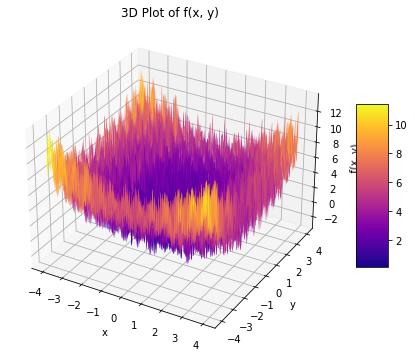

In [4]:

# Define the range of x and y values
x = np.linspace(-4.0, 4.0, 1000)
y = np.linspace(-4.0, 4.0, 1000)
X, Y = np.meshgrid(x, y)

# Calculate the values of the function on the grid
Z = f(X, Y)
# Plot the function
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Plot of f(x, y)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()



If we investigate a bit further, using numpy, we see that our minimum is found at approximately $(-0.028, 021)$.

In [5]:
min_index = np.unravel_index(np.argmin(Z), Z.shape)
min_x = X[min_index]
min_y = Y[min_index]

print(f"Minimum value found for x = {min_x}, y = {min_y}, \nf(x,y) = {f(min_x,min_y)}")


Minimum value found for x = -0.02802802802802784, y = 0.21221221221221231, 
f(x,y) = -3.2565040010453776


**Question 4:** By looking at the function $f$, we know that the terms responsible for the oscillatory behaviour of the function are the first 5, because of the presence of the $sin$ function, which is sinusoidal. The last term does not oscillate. We illustrate this with the plots below.

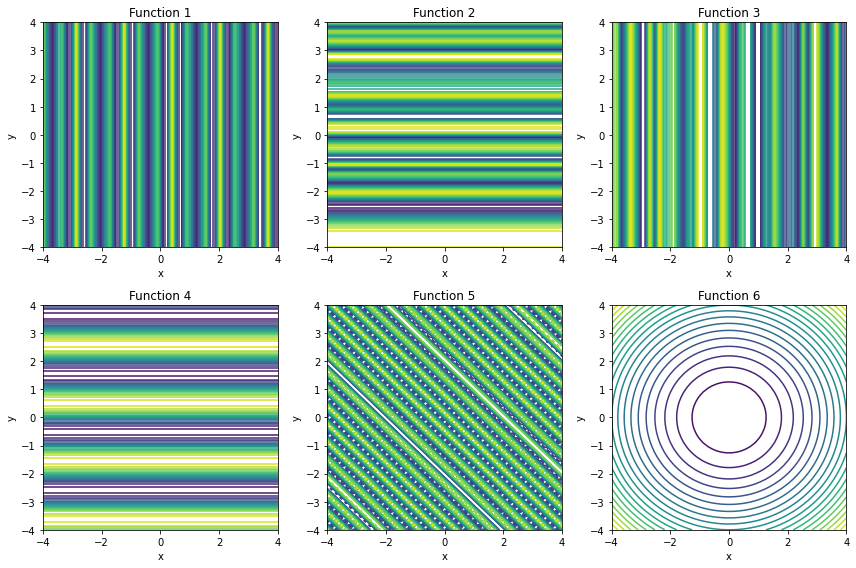

In [6]:

x = np.linspace(-4, 4)
y = np.linspace(-4, 4)
X, Y = np.meshgrid(x, y)

function_list = [np.exp(np.sin(50*X)),
                 np.sin(60*np.exp(Y)),
                 np.sin(70*np.sin(X)),
                 np.sin(np.sin(80*Y)),
                 np.sin(10*(X+Y)),
                 (X**2 + Y**2)/4]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    ax.contour(X, Y, function_list[i], levels=20, cmap='viridis')
    ax.set_title('Function {}'.format(i+1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


As we can see, a small change in $x$ or $y$ radically changes the value of the first 5 terms, as opposed to the last fraction. We could see that right away, as for example, for the term $sin(70sin(x))$, a small change in x will radically change the value of the term since we multiply it by 70.

**Question 5:**

In [7]:

N_values = [2**k + 1 for k in range(4, 11)]
search_region = [-4, 4]

minimum_points = []

# Iterate over different grid sizes
for N in N_values:
    
    x = np.linspace(search_region[0], search_region[1], N)
    y = np.linspace(search_region[0], search_region[1], N)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Find the minimum and the corresponding point
    minimal_value = np.min(Z)
    indices = np.where(Z == minimal_value)
    x_min, y_min = X[indices[0][0], indices[1][0]], Y[indices[0][0], indices[1][0]]

    minimum_points.append((x_min, y_min))
    
    print(f"For N = {N}, minimal value of f: {minimal_value} at point ({x_min}, {y_min})")



For N = 17, minimal value of f: -1.7612874733047068 at point (-0.5, -0.5)
For N = 33, minimal value of f: -1.8463465039832796 at point (1.25, -0.5)
For N = 65, minimal value of f: -1.8463465039832796 at point (1.25, -0.5)
For N = 129, minimal value of f: -2.449624019189007 at point (0.0625, -0.5)
For N = 257, minimal value of f: -2.943575583284294 at point (0.34375, -0.09375)
For N = 513, minimal value of f: -3.163951672593782 at point (-0.390625, -0.09375)
For N = 1025, minimal value of f: -3.3035189068552118 at point (-0.0234375, 0.2109375)


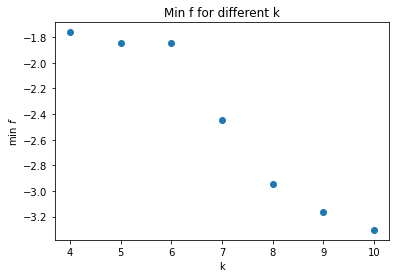

In [8]:
f_eval=[f(point[0],point[1]) for point in minimum_points]
plt.scatter(np.arange(4,11), f_eval)
plt.title("Min f for different k")
plt.ylabel("min $f$")
plt.xlabel("k")
plt.show()

As we can see, the more we increase $k$, the more accurate our results. However, when $k=10$, the minimum does not change too much. This means that we probably are very close to the minimum, and that for $k=11$ for example, the minimum will stay the same.

**Question 6:**

As seen from above, the lowest value for the function f is found for $k=10$. Thus, we run a GD with line search to find the corresponding minimal value.

In [9]:
def df(x, y):
    """
    The gradient of the function f.
    """
    
    return np.array([
        np.exp(np.sin(50*np.sin(x)))*50*np.cos(50*x) + \
        np.cos(70*np.sin(x))*70*np.cos(x) - \
        np.cos(10*(x+y))*10 + \
        x/2, 
        np.cos(60*np.exp(y))*60*np.exp(y) + \
        np.cos(np.sin(80*y))*80*np.cos(80*y) - \
        np.cos(10*(x+y))*10 + \
        y/2
        ])

In [10]:
def gradientFixedStep(f,df,x_init,step=1e-01,tol=1e-06,maxiter=100000):
    # initialization
    x=np.array(x_init).copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x[0], x[1]))
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.linalg.norm(xtab[-1]-xtab[-2]))>tol):
        it=it+1
        g = df(x[0], x[1])
        # line-search 
        x=x-step*g
        xtab.append(x)
        ftab.append(f(x[0], x[1]))
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

In [11]:
x0 = minimum_points[-1]
print("Initial x0: ", x0)
print("f(x0) = ", f(x0[0], x0[1]))

xtab, ftab, conv = gradientFixedStep(f, df, x0, step=1e-6)
print("GD Convergence =",conv)

print("x*: ", xtab[-1])
print("f(x*) = ", ftab[-1])


Initial x0:  (-0.0234375, 0.2109375)
f(x0) =  -3.3035189068552118
GD Convergence = True
x*:  [-0.02424029  0.21062707]
f(x*) =  -3.3067880583400204


**Question 7:** 



In [12]:
for k,x0 in enumerate(minimum_points):
    print("k =",k+4)
    print("Initial x0: ", x0)
    print("f(x0) = ", f(x0[0], x0[1]))

    xtab, ftab, conv = gradientFixedStep(f, df, x0, step=1e-6)
    print("GD Convergence =",conv)

    print("x*: ", xtab[-1])
    print("f(x*) = ", ftab[-1])
    print("\n")

k = 4
Initial x0:  (-0.5, -0.5)
f(x0) =  -1.7612874733047068
GD Convergence = True
x*:  [-0.51747475 -0.49645338]
f(x*) =  -1.655433330560073


k = 5
Initial x0:  (1.25, -0.5)
f(x0) =  -1.8463465039832796
GD Convergence = True
x*:  [ 1.23850084 -0.49430544]
f(x*) =  -1.9244011098535818


k = 6
Initial x0:  (1.25, -0.5)
f(x0) =  -1.8463465039832796
GD Convergence = True
x*:  [ 1.23850084 -0.49430544]
f(x*) =  -1.9244011098535818


k = 7
Initial x0:  (0.0625, -0.5)
f(x0) =  -2.449624019189007
GD Convergence = True
x*:  [ 0.07219126 -0.49599852]
f(x*) =  -2.8449410792417464


k = 8
Initial x0:  (0.34375, -0.09375)
f(x0) =  -2.943575583284294
GD Convergence = True
x*:  [ 0.34241203 -0.09452394]
f(x*) =  -2.9524229870554826


k = 9
Initial x0:  (-0.390625, -0.09375)
f(x0) =  -3.163951672593782
GD Convergence = True
x*:  [-0.39554076 -0.09320187]
f(x*) =  -3.2053023918532095


k = 10
Initial x0:  (-0.0234375, 0.2109375)
f(x0) =  -3.3035189068552118
GD Convergence = True
x*:  [-0.02424029  0.

The minimum reached with gradient descent is not the same for every initialization. Indeed, since we have oscillatory terms, we have a lot of local minimums. However, as we increase k to make the grid more dense, we obtain more significant values for the minimum.

**Question 8:** From our previous observations, we can infer that $-3.3067880583400204$, obtained at the point $(-0.02424029, 0.21062707)$ is the global minimum for our function. It is close to the value we found with numpy at first. Moreover, as we can see in the plot below, if we increase $k$ to be equal to 11 for example, we notice that our gradient descent returns the same value for the minimum and the same point. This means that we captured all the oscillations, and we found the global minimum, which supports the first claim.

In [13]:
search_region=[-4, 4]
N=2**11 +1
x = np.linspace(search_region[0], search_region[1], N)
y = np.linspace(search_region[0], search_region[1], N)
X, Y = np.meshgrid(x, y)


Z = f(X, Y)

#Find minimum value and corresponding point 

minimal_value = np.min(Z)
indices = np.where(Z == minimal_value)
x_min, y_min = X[indices[0][0], indices[1][0]], Y[indices[0][0], indices[1][0]]
    

print(f"For N = {N}, minimal value of f: {minimal_value} at point ({x_min}, {y_min})")

x0=np.array([x_min,y_min])
xtab, ftab, conv = gradientFixedStep(f, df, x0, step=1e-6)
print("GD Convergence =",conv)

print("x*: ", xtab[-1])
print("f(x*) = ", ftab[-1])

For N = 2049, minimal value of f: -3.3035189068552118 at point (-0.0234375, 0.2109375)
GD Convergence = True
x*:  [-0.02424029  0.21062707]
f(x*) =  -3.3067880583400204


**Question 9:**


In [14]:
def estimate_grid_size(f, search_region, initial_N=17, max_N=513):
    
    N = initial_N

    
    prev_min_point = None

    # Iterate over different grid sizes
    while N <= max_N:
        
        x = np.linspace(search_region[0], search_region[1], N)
        y = np.linspace(search_region[0], search_region[1], N)
        X, Y = np.meshgrid(x, y)

        
        Z = f(X, Y)

        
        minimal_value = np.min(Z)
        indices = np.where(Z == minimal_value)
        x_min, y_min = X[indices[0][0], indices[1][0]], Y[indices[0][0], indices[1][0]]

        # Check if the minimum point has stabilized
        if prev_min_point is not None and abs(x_min - prev_min_point[0]) < 1e-6 and abs(y_min - prev_min_point[1]) < 1e-6:
            break

        # Update the previous minimum point
        prev_min_point = (x_min, y_min)
        N += 1

    return N

estimate_grid_size(f, search_region)

514

Since beyond this grid size, we capture all the oscillatory behavior, we can be sure that we captured the global minimum when $N \approx 514$, which is +1 more than $2^9+1$. In particular, if we go back to the cell above, the minimum $-3.3067880583400204$ that we found for $(x,y)=(-0.02424029  0.21062707)$ is obtain when $N>514$. Thus, we can conclude that it indeed the global minimum of our function.

### Part B:

We consider the function $J:[0,\infty)^2 \rightarrow \mathbb{R}$ defined by:

$$
J(x,y)=cosh(4x+y)
$$

Consider the following sets:
$$
\begin{align*}
    K_1 &= \{(x, y) \in [0, \infty)^2 \mid xy \geq 1\} \\
    K_2 &= \{(x, y) \in [0, \infty)^2 \mid y \leq 1 + x, y \geq 2 - x\}
\end{align*}
$$

**Question 10:** We say that a set $K$ is convex if for all x,y $\in K, t\in[0,1], tx+(1-t)y \in K$


Let $x=(x_1,y_1), y=(x_2,y_2) \in K_1$

Let $t\in [0,1]$

Let $z=(tx_1+(1-t)x_2,ty_1+(1-t)y_2)$

We check:

$$
(tx_1+(1-t)x_2)(ty_1+(1-t)y_2)=t^2(x_1y_1) + t(1-t)(x_1y_2+x_2y_1)+ (1-t)^2(x_2y_2) \geq t^2 + (1-t)^2 + (t-t^2)(x_1y_2+x_2y_1)\\
= 2t^2 -2t+1+ (t-t^2)(x_1y_2+x_2y_1)
=1+2t(t-1)+t(1-t)(x_1y_2+x_2y_1)\geq1
$$

Thus, $z\in K_1$, which proves that the set is convex.

Let us now prove that $K_2$ is convex.
Let $x=(x_1,y_1), y=(x_2,y_2) \in K_2$

Let $t\in [0,1]$
Let $z=(tx_1+(1-t)x_2,ty_1+(1-t)y_2)$

We check:

$$
ty_1+(1-t)y_2\leq t(1+x_1)+(1-t)(1+x_2)=1 + tx_1 + (1 - t)x_2
$$
$$
ty_1+(1-t)y_2\geq t(2-x_1)+(1-t)(2-x_2)=2-(tx_1+(1-t)x_2)
$$

Therefore, $z \in K_2$, which proves that $K_2$ is convex.

Let us show that $K_1$ is closed. Take the sequence $(x_n,y_n)_n \in K_1$ such as $\lim_{n\rightarrow \infty} (x_n,y_n)=(x,y)$. By definition, $x_ny_n\geq 1$. Thus, as we pass on to the limit, we have that $xy\geq 1$, which proves that $(x,y) \in K_1$, which proves that $K_1$ is closed. 

For $K_2$, let us take a sequence $(x_n,y_n)_n \in K_2$ such as $\lim_{n\rightarrow \infty} (x_n,y_n)=(x,y)$.
By definition, $y_n\leq 1+x_n$. As we pass to the limit, we have $y\leq 1+x$. Moreover, we have $y_n\geq 2-x_n$, and as we pass on to the limit, we get  $y\geq 2-x$. Thus, $(x,y)\in K_2$, which proves that $K_2$ is closed as well.


Let us prove now that the function $J$ is convex. 


Let us prove that for all z $\in \mathbb{R}, cosh(z)\geq1$ By definition, $cosh(z)=\frac{e^z+e^-z}{2}$. The derivative is $\frac{e^z-e^-z}{2}$, which is negative when $z<0$, positive when $z>0$ and equal to 0 when $z=0$. Therefore, $z=0$ is the minimum of this function, and $cosh(0)=1$. 

Now, let us look at the Hessian matrix of $J(x,y)$:
$$
H(J) = \begin{pmatrix}
16 cosh(4x + y) & 4 cosh(4x+y) \\
4 cosh(4x+y) & cosh(4x+y)
\end{pmatrix}
$$

If the Hessian is positive semi definite, then $J(x,y)$ is convex. Let us use Sylvester's criterion to prove that.

First, notice that $16 cosh(4x + y) \geq 0$

Moreover, $det(H(J))=16cosh(4x + y)^2-16cosh(4x + y)^2=0$. Thus, $H(J)$ is positive semi definite and this proves that $J$ is convex.

Now, we know that $K_1,K_2$ are closed and finite dimensional. Therefore, by definition, they are compact sets. Moreover, $J$ is convex and continuous (since $cosh$ is continuous). Thus, we know that every continous function has minimizers in a compact set, which proves that $J$ admits minimizers in $K_1$ and $K_2$.



**Question 11:**

In [15]:
def J(x):
    return np.cosh(4 * x[0] + x[1])

def grad_J(x):
    return np.array([4 * np.sinh(4 * x[0] + x[1]), np.sinh(4 * x[0] + x[1])])

def J_K1(x):
    mask = x[0] * x[1] >= 1
    return np.where(mask, J(x), np.nan)

def J_K2(x):
    mask = (x[1] <= 1 + x[0]) & (x[1] >= 2 - x[0])
    return np.where(mask, J(x),np.nan)

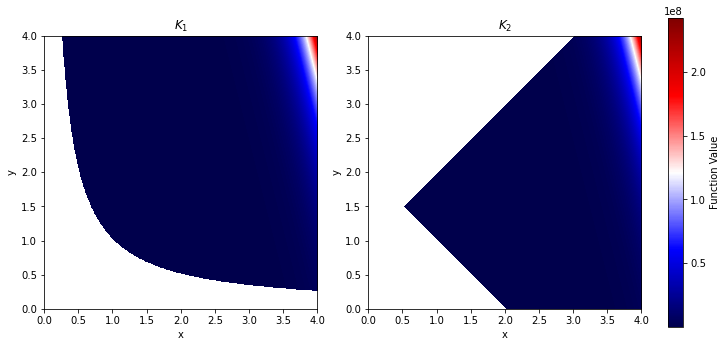

In [16]:
M = 4
x = np.linspace(0, M, 1000)
y = np.linspace(0, M, 1000)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sh = X.shape
y1 = np.array([J_K1([a, b]) for a, b in zip(X.flatten(), Y.flatten())]).reshape(sh)
y2 = np.array([J_K2([a, b]) for a, b in zip(X.flatten(), Y.flatten())]).reshape(sh)


# Plot K1
im1 = ax[0].imshow(y1, extent=[x[0], x[-1], y[0], y[-1]], cmap="seismic", origin='lower')
ax[0].set_title("$K_1$")
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# Plot K2
im2 = ax[1].imshow(y2, extent=[x[0], x[-1], y[0], y[-1]], cmap="seismic", origin='lower')
ax[1].set_title("$K_2$")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

# Adjust layout
plt.tight_layout()

# Add colorbar outside the plot
cbar = fig.colorbar(im2, ax=ax.ravel().tolist(), pad=0.04, fraction=0.046)
cbar.set_label('Function Value')

# Show the plot
plt.show()

As we can see in the plot for $K_2$, the minimum seems to be attained for $(0.5,1.5)$. For $K_1$, it is a bit difficult to find an exact point, but we can conjecture that it will be obtained at the boundary of $K_1$, paramterized by the line $xy=1$. Let us now look at the log values to get a better answer.

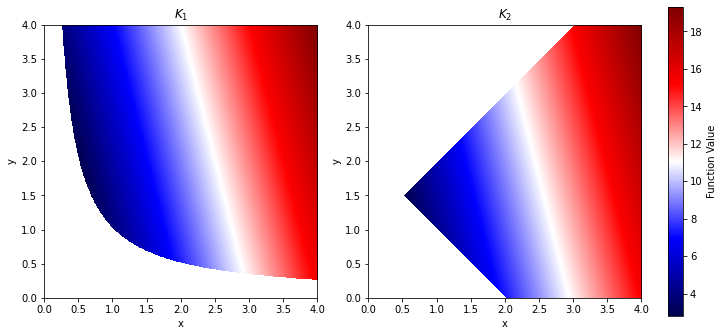

In [17]:
M = 4
x = np.linspace(0, M, 1000)
y = np.linspace(0, M, 1000)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sh = X.shape
y1 = np.array([J_K1([a, b]) for a, b in zip(X.flatten(), Y.flatten())]).reshape(sh)
y2 = np.array([J_K2([a, b]) for a, b in zip(X.flatten(), Y.flatten())]).reshape(sh)


# Plot K1
im1 = ax[0].imshow(np.log(y1), extent=[x[0], x[-1], y[0], y[-1]], cmap="seismic", origin='lower')
ax[0].set_title("$K_1$")
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# Plot K2
im2 = ax[1].imshow(np.log(y2), extent=[x[0], x[-1], y[0], y[-1]], cmap="seismic", origin='lower')
ax[1].set_title("$K_2$")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

# Adjust layout
plt.tight_layout()

# Add colorbar outside the plot
cbar = fig.colorbar(im2, ax=ax.ravel().tolist(), pad=0.04, fraction=0.046)
cbar.set_label('Function Value')

# Show the plot
plt.show()

As we can see, the minimum for $K_2$ is clearly at $(0.5,1.5)$, and for $K_1$, we have a clearer view on where it lies : $[0.3,0.8]$ x $[1.5,2.5]$


**Question 12:**

Let us compute the projection on the set $K_1$. For a given $X=(x,y) \in \mathbb{R^2}$, we distinguish 2 cases:

- $X\in K_1$

- $X \notin K_1$

If $X \in K_1$, then its projection is itself. If $X \notin K_1$, then the projection would be on the boundary of $K_1$, i.e, it would satisfy $xy=1$. Thus, we can use this result and the parametric curve $t \mapsto (t,\frac{1}{t})$ for $t>0$.

The derivative of the curve is given by $t \mapsto (1,\frac{-1}{t^2})$. 


By definition, we know that $(x - t, y - 1/t)$ is orthogonal to the derivative of the curve, i.e, that their dot product is equal to $0$.


Hence, we have:

$$
 \langle(x-t, y-1/t), (1, -1/t^2)\rangle =0
 \iff x - t - y/t^2 + 1/t^3 =0
 \iff t^4 - xt^3 + yt - 1=0
$$

Since we have a degree 4 equation, we will choose to solve the equation numerically rather than explicitly in the cells below.



In [18]:
def proj_K1(x):
    if x[0]*x[1] >= 1 and x[0] > 0:
        return x
    else:
        def func(t):
            return t**4 - x[0]*t**3 + x[1]*t - 1
        def dfunc(t):
            return 4*t**3 - 3*x[0]*t**2 + x[1]
         # Random value for t
        t0 = 0.5
        
        # Newton's method for finding root
        for _ in range(1000):
            t1 = t0 - func(t0) / dfunc(t0)
            if np.abs(t1 - t0) < 1e-6:
                break
            t0 = t1
        return [t1, 1/t1]


In [19]:
def projected_gradient_descent(x0, alpha, max_iters, tolerance=1e-6):
    x = x0 
    conv = False

    for iteration in range(max_iters):
        gradient = grad_J(x) 
        x_new = x - alpha * gradient
        x_new = proj_K1(x_new)

        if np.linalg.norm(np.array(x_new) - np.array(x)) < tolerance:
            conv = True
            break
        x = x_new

    return x, conv

# Initial point
x0 = np.array([1, 1])
alpha = 0.1
max_iters = 1000

result, conv = projected_gradient_descent(x0, alpha, max_iters)

print("Result:", result)
print("Converged:", conv)
print("J(result):", J(result))

Result: [0.5000003210078211, 1.99999871596954]
Converged: True
J(result): 27.30823283603898


As we can see, the approximative solution for the problem $min_{(x,y)\in K_1}J(x,y)$ using the projected gradient algorithm is the point $(0.5,2)$

**Question 13:**

Define $J_2(x,y)=4x+y$. We can write $J(x,y)=J(J_2(x,y))$

As stated before, for a point z, the derivative of $J$ is $\frac{e^z-e^-z}{2}$, which is strictly positive when $z>0$, which means that $J$ is increasing. 

Since we only consider points $(x,y)$ in $K_1,K_2$, they are all greater or equal to 0, thus, minimizing $J$ is the same as minimizing $J_2$.

We see that minimizing $J_2$ for $K_2$ is equivalent to solving the linear program:

$\min_{(x,y) \in K_2}4x+y$

In particular, we have these constraints:
$$
\begin{cases}
x\geq0 \\
y\geq0 \\
-x+y \le 1 \\
-x-y \le -2
\end{cases}
$$


In [20]:
bounds_x = (0, None)
bounds_y = (0, None)


A = [[-1, 1], [-1, -1]]
b = [1, -2]
c = [4, 1]

optimize.linprog(c, A_ub=A, b_ub=b, bounds=[bounds_x, bounds_y])


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.5
              x: [ 5.000e-01  1.500e+00]
            nit: 2
          lower:  residual: [ 5.000e-01  1.500e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.500e+00 -2.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

As we can see, the minimizer of $J$ for $(x,y) \in K_2$ is $(0.5,1.5)$

**Question 14:** 

We have that:
$$
\nabla J(x,y)=(2(e^{4x+y}-e^{-4x-y}),\frac{e^{4x+y}-e^{-4x-y}}{2})
$$

In particular, $J(x,y)=(0,0)$ if $e^{4x+y}=e^{-4x-y}$, which is true iff $x=\frac{-y}{4}$. However, since $(x,y) \in [0,\infty)^2$, the only solution is $x=y=0$.
However, notice that $(0,0) \notin K_1$. Since we proved that $J$ admits a minimum in $K_1$, we know that the minimum lies in the border of $K_1$ (since it cannot be in the interior of $K_1$ given that the gradient would be 0 at that point. We also can say that the minimum in $K_1$ is not a global minimum.

Let us compute the minimum $(x,y)$ of $J$ in $K_1$.

We know that $(x,y) \in [0,\infty)^2$ and that $xy=1 \iff y=\frac{1}{x}$ (we can divide by $x$ because in order to have $xy=1$, we need $x \neq 0$)

Since we want to minimize $4x+y=4x+\frac{1}{x}$, we compute the derivative (denote the function $g(x)=4x+\frac{1}{x}$):
$$
g'(x)=4-\frac{1}{x^2}
$$

This derivative is positive when $x>\frac{1}{2}$, negative when $x<\frac{1}{2}$ and is equal to $0$ when $x=\frac{1}{2}$. Since $g''(x)=\frac{2}{x^3} >0$, we have that the global minimum for $g$ is found for $x=\frac{1}{2}$. 

Thus, $y=\frac{1}{x}=2$.



Finally, we conclude that the minimizer for $J$ on $K_1$ is $(0.5,2)$. Notice that this minimizer is exactly the one we found for question 12.


